In [15]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from skimage import io

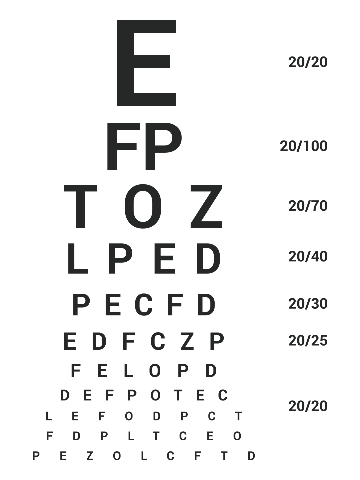

In [16]:
#import the example image
image = io.imread("https://www.printablee.com/postpic/2015/06/free-printable-eye-chart_112469.jpg")

image = cv2.resize(image, (360, 480))
cv2_imshow(image)

 The formula provided in the image is:

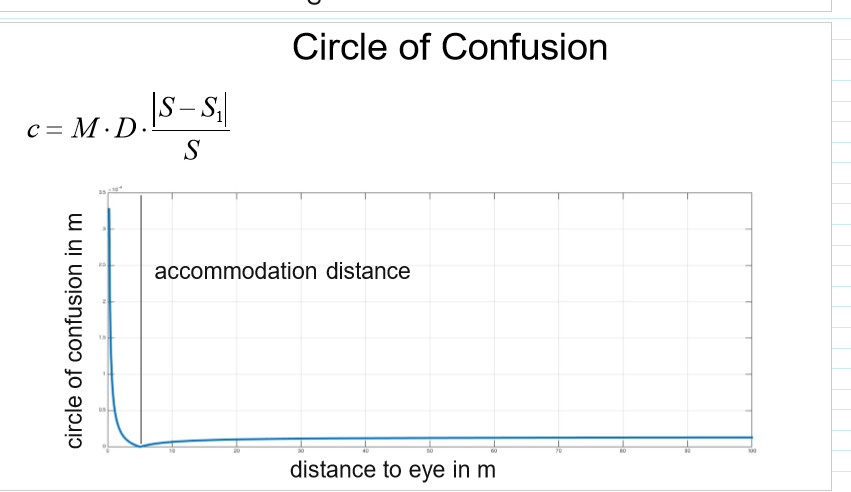

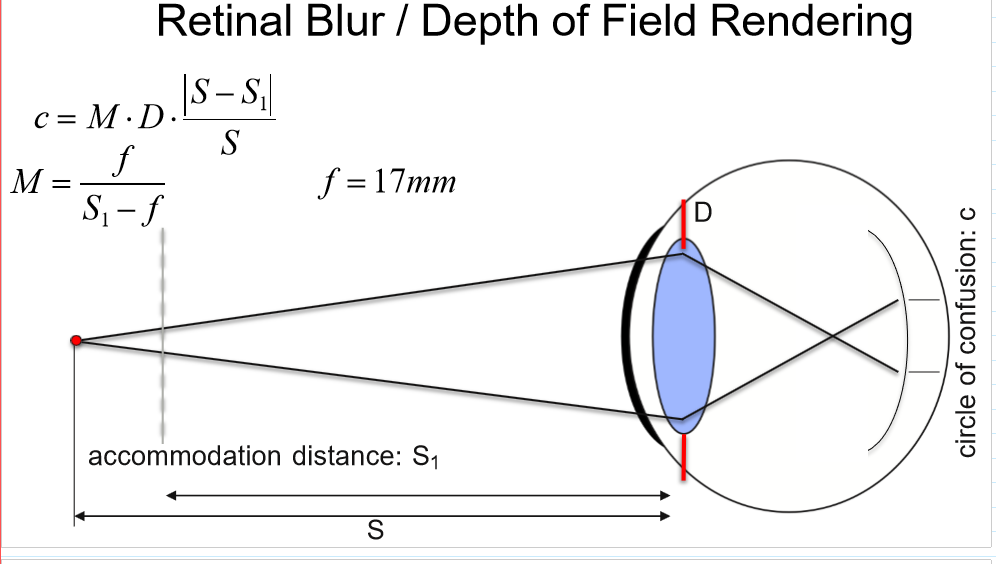

In [19]:
#TODO: get the equation parameters from the user

def get_inputs():
    # f = float(input("Enter the focal length of the eye f (in mm): "))
    # D = float(input("Enter the aperture D (in mm): "))
    # S1 = float(input("Enter the focal distance of the image S1 (in mm): "))
    # S = float(input("Enter the actual distance from the image to the eye S (in mm): "))
    # return f, D, S1, S
    return (17, 20, 30, 1000)

def calculate_coc(f, D, S1, S):
    M = (f) / (S1 - f)  # Magnification
    coc = M * D * abs(S - S1) / S
    return coc

def apply_blur(image, blur_radius):
    # Kernel size must be a positive odd integer.
    kernel_size = int(round(blur_radius))
    # Ensure the kernel size is at least 1 and an odd number
    kernel_size = max(1, kernel_size)
    if kernel_size % 2 == 0:
        kernel_size += 1  # Make the kernel size odd if it's not already.

    # Apply Gaussian blur to the image using the calculated kernel size.
    blurred_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

    return blurred_image


def get_blur_radius(coc):
  radius_in_mm = coc / 2
  # source: https://www.unitconverters.net/typography/millimeter-to-pixel-x.htm
  radius_in_px = radius_in_mm * 3.7795275591
  return radius_in_px


# Test the functions
f, D, S1, S = get_inputs()

the kernel size in the cv2.GaussianBlur function must be a positive odd integer. When you convert the Circle of Confusion (CoC) value to an integer, it needs to be rounded to the nearest odd integer to satisfy this requirement. If the CoC is less than 1, converting it to an integer will result in 0, which is not a valid kernel size.

In [21]:

# TODO: calulate the circle of confusion

c = calculate_coc(f, D, S1, S)
blur_radius = get_blur_radius(c)
print("Circle of Confusion: ", c, "mm")
print("Blur radius", blur_radius, "px")

# calculate the size of the blur
blur_image = apply_blur(image, blur_radius)

Circle of Confusion:  25.369230769230768 mm
Blur radius 47.94185342273769 px


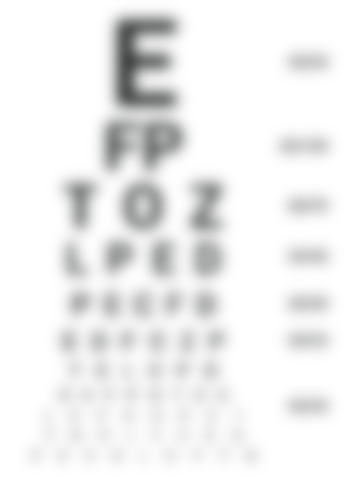

In [22]:
#apply a gaussian filter with the radius of the blur

cv2_imshow(blur_image)